### Import the dataset (from 24th April 2022 to 17 May 2022) 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = (15, 9)
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('curved_labelled_data.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
df.rename(columns = {'Unnamed: 0':'x_column' }, inplace = True)

### Plotting the dataset 

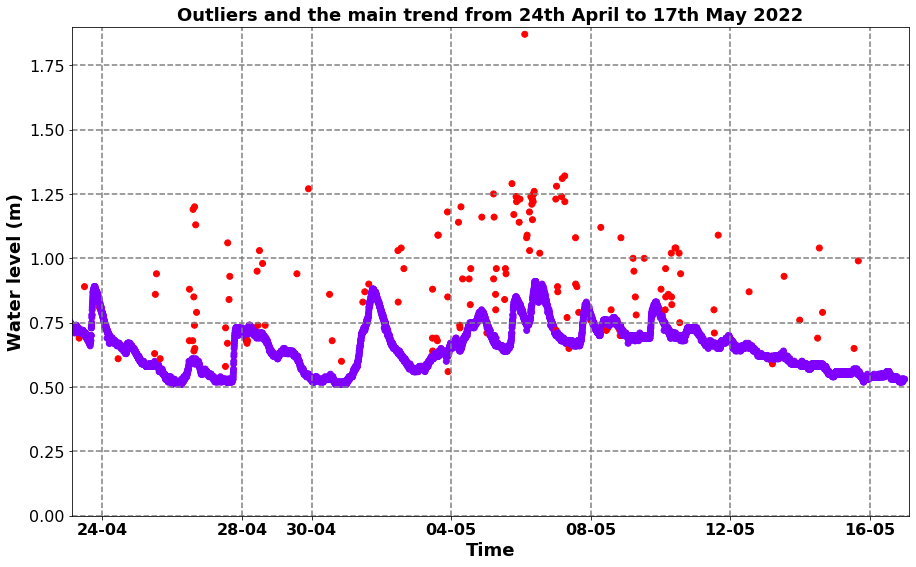

In [4]:
plt.rcParams['figure.figsize'] = (15, 9)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
ax.scatter(df['time'],df['height'], c= df['data_label'], cmap='rainbow')
ax.grid(color = 'gray', linestyle = '--', linewidth = 1.5)
ax.set_title('Outliers and the main trend from 24th April to 17th May 2022', fontsize=18, weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-04-24 00:00:00'],['2022-05-17 23:59:59'])
ax.set_ylim(0, 1.9)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.set(facecolor = "white")

plt.savefig('sample_photo_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### Local Outlier Factor
- Unsupervised Outlier Detection using the Local Outlier Factor (LOF).
- It measures the local deviation of the density of a given sample with respect to its neighbors.

In [5]:
from sklearn.neighbors import LocalOutlierFactor
import datetime as datetime
import numpy as np
water_level = np.array(df['height'])

### Anomaly detection 

In [6]:
length = np.array(df.height)
water_arrays = np.array_split(length, 24)

### LOF water level data fitting 

In [7]:
sup_list = []
for array in water_arrays:
    lof_labels_cc = LocalOutlierFactor(n_neighbors = 246, metric='euclidean').fit_predict(array.reshape(-1, 1))
    sup_list.append(lof_labels_cc)
#print(sup_list)

In [8]:
l = []
for i in sup_list:
    for ii in i.tolist():
        l.append(ii)        
len(l)

6712

In [9]:
lof_labels = l
df['lof_labels'] = lof_labels
df.to_csv ('lof_output_curved.csv', header=True,index = False)

In [10]:
lof_list = list(df['lof_labels'])
clusters =[]
for i in lof_list:
    if i == 1:
        cluster = 0
    else:
        cluster = 1
    clusters.append(cluster) 
    p = clusters

In [11]:
df['lof_labels'] = p

In [12]:
df.to_csv ('lof_output_metric_curved.csv', header=True,index = False)

In [13]:
temp_df = df.loc[(df['lof_labels'] == 0)]
df3 = temp_df.set_index('time')
df4 = df3.reset_index()

In [14]:
temp_df1 = df.loc[(df['lof_labels'] == 1)]
df5 = temp_df1.set_index('time')
df6 = df5.reset_index()

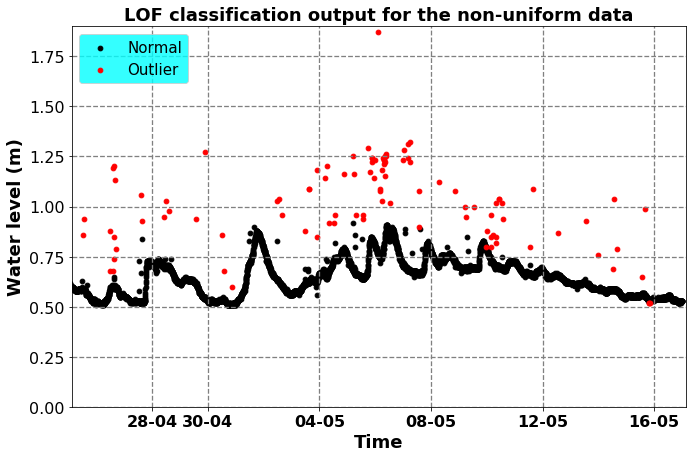

In [15]:
plt.rcParams['figure.figsize'] = (11, 7)
fig, ax = plt.subplots(1,1)
fig.patch.set_facecolor('white')
Normal = ax.scatter(df4['time'],df4['height'], c ="black", marker="o", s = 10**1.35)
Outlier = ax.scatter(df6['time'],df6['height'], c ="red",marker ="o", s = 10**1.35)
ax.grid(color = 'gray', linestyle = '--', linewidth = 1.3)
ax.set_title('LOF classification output for the non-uniform data', fontsize=18, weight='bold')
ax.set_xlabel('Time', fontsize=18, weight = 'bold')
ax.set_ylabel('Water level (m)', fontsize=18, weight = 'bold')
ax.set_xlim(['2022-04-26 00:00:01'],['2022-05-17 23:59:59'])
ax.set_ylim(0,1.9)
ax.set_xticklabels(df['time'], fontsize=16, weight='bold')
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x',which='major', labelsize=16)

## Define the date format
date_form = DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)
ax.legend(["Normal", "Outlier"], loc ="upper left", fancybox=True,facecolor='#01FFFF',prop={'size': 15,  'style': 'normal'})
ax.set(facecolor = "white")
plt.savefig('LOF_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

### Model metrics

In [16]:
from sklearn.metrics import accuracy_score, f1_score,precision_score, recall_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
data_labels = list(df['data_label'])
lof_labels = list(df['lof_labels'])

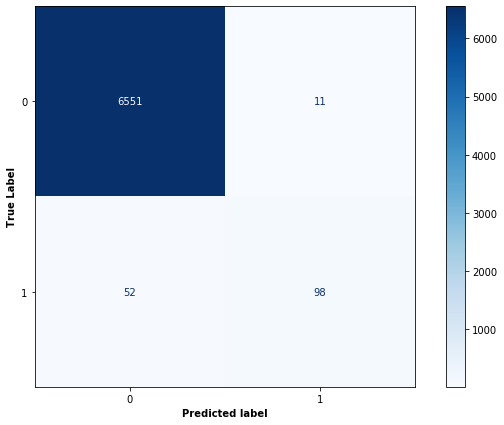

In [17]:
c_matrix = confusion_matrix (data_labels,lof_labels)
disp = ConfusionMatrixDisplay(c_matrix )
disp.plot(cmap=plt.cm.Blues,values_format='g',)
plt.xlabel('Predicted label', weight = 'bold')
plt.ylabel('True Label', weight = 'bold')


plt.savefig('con_curved.png', dpi=450, orientation='portrait', bbox_inches='tight', facecolor='w',edgecolor='b',)
plt.show()

In [18]:
data_accuracy = accuracy_score (data_labels,lof_labels)
data_accuracy

0.9906138259833135

In [19]:
data_precision = precision_score (data_labels,lof_labels)
data_precision

0.8990825688073395

In [20]:
data_recall_score = recall_score (data_labels,lof_labels)
data_recall_score

0.6533333333333333

In [21]:
data_f1_score = f1_score (data_labels,lof_labels)
data_f1_score

0.7567567567567568